# Introduction

In [745]:
myfile='movie_metadata.csv'

#standard imports for when working with pandas
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

#read data from a csv file
df = pd.read_csv(myfile,index_col=None)

# Dealing with missing values

One of the first steps in the stage of data preprocessing is handling missing values. If they are not handled properly, then there is a big possibility that our inference about the data will be inaccurate. There are two ways we can effectively 
deal with this problem, imputation and removal. In imputation we usualluy replace the missing value with the mean of the column values while in removal we drop the whole row that has the missing value. **As our primary goal is to effectively deliver a report that will make the investment succesful** we have focused on dealing with the missing values around the "budget" and "gross" category. By analyzing the dataset we found that "budget" and "gross" had 492 and 884 missing values from the 5043 columns. As the type of these two variables is very specific we chose to drop them all and not **impute** them with the mean because this would have probably added bias to our data. After the removal our new dataset has 3891 columns instead of 5043.

In [746]:
# How many values are NaN for each column out of 5043
na_values = df.isnull().sum()

# Drop missing values for budget,gross and duration category
df = df.dropna(subset=['budget','gross'])

# How many values are NaN after the adjustment
na_values = df.isnull().sum()

# Creating a new variable called 'profit'

As we said earlier the two most important variables of our dataset are "budget" and "gross". If we dedact the cost of budget from the total gross of the movie we have the total profit of the movie. So, we created the "profit" variable that is the result of the deduction that we stated before.

In [747]:
# Create a column with the return of the movie and add it to the dataframe
df['profit'] = df['gross'] - df['budget']

# Creating a subset with the variables we want to work with

Our dataset has in total 29 variables with the one we added above. Although there are many ways to analyze this dataset, we only need some of them to draw some conclusions. So we selected to work with 8 in total, "director_name", "profit", "title_year", "duration", "country", "budget", "gross", "imdb_score".

In [748]:
# create a subset of our categories that we are going to work with
df = df[['director_name','profit','title_year','duration','country','budget','gross','imdb_score']]

# Currency and Inflation data 

There were two major challenges that we encountered during preprocessing. The first one was the different currencies that were used for the production of some movies as there were some very unusual values inside the "budget", "gross" and "profit" category. For example, a movie that Joon-ho Bong directed in South Korea the year 2006 had a budget of 12.2 billion according to the data. This is a clear indicator that there is more than one currencies in the categories we stated before. In order to deal with this challenge we converted all currencies to US dollars (USD). We used the yearly exchange rate of every currency with USD from 1st January of every year from 2000 to 2018. The second one was the implementation of inflation rates of every country to these three categories from 2000 to 2018. After these the data in "budget", "gross" and "profit" were normalised in respect to the value USD has in 2018 adjusted by the iflation rates of every country. 

 Unfortunately I did not have the option for this assignment to upload the .csv file with the currency exchange rates and the inflation rates, so I created a dictionary with all the values. 

In [777]:
currency = 'book1.csv'
cur = pd.read_csv(currency,index_col=None)
cur['Year'] = cur['Year'].astype(float)

# Example with the South Korean director
# df.loc[(df['director_name'] == 'Joon-ho Bong') & (df['title_year'] == 2006)]

In [750]:
ssss = df
for i,row in df.iterrows():
    if (row['country'] == 'USA') & (row['title_year']>1999):
        fgfg = cur[(cur["Year"] == row["title_year"]) & (cur["Country"] == row["country"])]
        
        infl_budget = row['budget'] * fgfg['Inflation']
        df.set_value(i,'budget',infl_budget)

        infl_gross = row['gross'] * fgfg['Inflation']
        df.set_value(i,'gross',infl_gross)

        infl_profit = row['profit'] * fgfg['Inflation']
        df.set_value(i,'profit',infl_profit)
    
    
    if (row['title_year'] > 1999) & ((row['country'] == 'UK') | (row['country'] == 'France') | (row['country'] == 'Germany') | (row['country'] == 'Canada') | (row['country'] == 'Australia') | (row['country'] == 'Spain')):
        asdff = cur[(cur["Year"] == row["title_year"]) & (cur["Country"] == row["country"])]

        dol_budget = row["budget"] / asdff["Value"].item()
        df.set_value(i,"budget",dol_budget)

        dol_gross = row['gross'] / asdff["Value"].item()
        df.set_value(i,'gross',dol_gross)

        dol_profit = row['profit'] / asdff["Value"].item()
        df.set_value(i,'profit',dol_profit)       

C:\Users\Markos\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\Markos\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Markos\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\Markos\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Markos\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a fu

# Movies ''title_year''  category Analysis 

The first variable we edited was the "title_year" which corresponds to the year that a movie was produced. Below we plotted the data using a histogram in order see in which years were the most common for the production of movies. **( what a histogram represents?)**

# Histogram of distribution of ''title_year''

The histogram below depicts the frequency of the movies produced throughout the years. We can see that the distribution is left skewed as the number of movies created until 1980 is not so big. From 1980 and after it starts rising and skyrockets after the late 90s until 2016. So, we decided to make our sample smaller and include movies that were produced only after 1999 until 2016. The reason is that by making this adjustment we have created a target group that have watched movies the last 16 years and makes it easier to get some insights about them. This move narrowed down our sample by 27.06%, from 3891 rows to 2839.

C:\Users\Markos\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


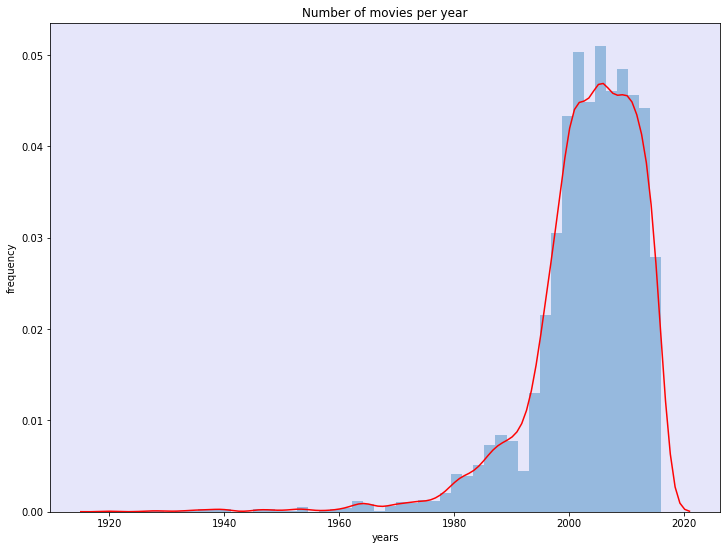

In [751]:
# Creating a histogram of the number of movies per year
plt.rcParams["figure.figsize"] = [12,9] 
sns.distplot( a=df["title_year"], hist=True, kde=True, rug=False,
             rug_kws={"color": "orange", "alpha":0.3, "linewidth": 1, "height":0.05 },
             kde_kws={"color": "red", "alpha":5, "linewidth": 1.5, "shade":False })

# Setting color in the histogram background 
plt.axes().set_facecolor("lavender")

# Adding title and axis names
plt.title('Number of movies per year')
plt.xlabel('years')
plt.ylabel('frequency')

# Show graphic
plt.show()

In [752]:
# ssss = new
# for i,row in new.iterrows():
    
#     fgfg = cur[(cur["Year"] == row["title_year"]) & (cur["Country"] == row["country"])]
#     #print(fgfg)
#     infl_budget = row['budget'] * fgfg['Inflation']
#     new.set_value(i,'budget',infl_budget)
    
#     infl_gross = row['gross'] * fgfg['Inflation']
#     new.set_value(i,'gross',infl_gross)
    
#     infl_profit = row['profit'] * fgfg['Inflation']
#     new.set_value(i,'profit',infl_profit)
    
    
#     if(row["country"] != "USA"):
#         asdff = cur[(cur["Year"] == row["title_year"]) & (cur["Country"] == row["country"])]

#         dol_budget = row["budget"] / asdff["Value"].item()
#         new.set_value(i,"budget",dol_budget)
        
#         dol_gross = row['gross'] / asdff["Value"].item()
#         new.set_value(i,'gross',dol_gross)
        
#         dol_profit = row['profit'] / asdff["Value"].item()
#         new.set_value(i,'profit',dol_profit)       

# Production "country" category Analysis

The next variable that we analysed was "country" which refers to the country a movie was produced. Because there were 47 unique countries in this category we chose the first seven countries with the most movies produced and we made a subset out of them. These seven were USA, UK, France, Germany, Spain, Canada, Australia. In our new subset named "new" we also implemented the 'title_year' and 'budget' conditions and included only movies produced from 2000 and after with a budget lower than 7.5 million dollars. After that we created a barplot with the number of movies per country.

In [753]:
# Find the number of movies produced in every country in the starting dataset named "df"
count = df.loc[:,['director_name', 'country']].groupby('country')['director_name'].count()
df_movies_count = count.reset_index(name='No. of movies').sort_values(['No. of movies'], ascending=False)

# Check how many unique countries are in the "country" category
df['country'].unique()

# Create a new subset named "new" with the 7 countries with the most movies from the "df" dataset
new = df.loc[(df['country'] == 'USA') | (df['country'] == 'UK') | (df['country'] == 'France') | (df['country'] == 'Germany') | (df['country'] == 'Canada') | (df['country'] == 'Australia') | (df['country'] == 'Spain')]

# Set "title_year" and "budget" conditions to the "new" dataset
new = new.loc[(new['title_year'] > 1999) & (new['budget'] < 7500000)]
# Reset index
new.reset_index()

# Find the number of movies produced in every country in the "new" dataset 
movies_per_country = new.loc[:,['director_name', 'country']].groupby('country')['director_name'].count()
new_movies_count = movies_per_country.reset_index(name='No. of movies').sort_values(['No. of movies'], ascending=False)
# new_movies_count
new

,director_name,profit,title_year,duration,country,budget,gross,imdb_score
2120,David Palmer,1.233388e+07,2012.0,100.0,USA,2.100000e+06,1.443388e+07,6.1
2326,John Hillcoat,-7.571886e+04,2005.0,104.0,Australia,1.525437e+06,1.449718e+06,7.4
2511,Trent Cooper,1.387024e+07,2006.0,89.0,USA,4.760000e+06,1.863024e+07,3.1
2638,David Ayer,3.568215e+07,2012.0,109.0,USA,7.350000e+06,4.303215e+07,7.7
2893,John Stainton,8.372766e+06,2002.0,90.0,Australia,7.068291e+06,1.544106e+07,5.4
3057,Dewey Nicks,-3.938968e+06,2002.0,86.0,Canada,7.004585e+06,3.065616e+06,5.3
3064,Tim Blake Nelson,1.498367e+07,2001.0,95.0,USA,6.800000e+06,2.178367e+07,6.2
3099,Tyler Perry,6.810551e+07,2006.0,107.0,USA,7.140000e+06,7.524551e+07,5.0
3154,Tuck Tucker,1.421098e+07,2002.0,76.0,USA,3.990000e+06,1.820098e+07,5.9
3158,Joel Edgerton,3.915900e+07,2015.0,108.0,USA,5.050000e+06,4.420900e+07,7.1


In [ ]:
# ssss = new
# for i,row in new.iterrows():
    
#     fgfg = cur[(cur["Year"] == row["title_year"]) & (cur["Country"] == row["country"])]
#     #print(fgfg)
#     infl_budget = row['budget'] * fgfg['Inflation']
#     new.set_value(i,'budget',infl_budget)
    
#     infl_gross = row['gross'] * fgfg['Inflation']
#     new.set_value(i,'gross',infl_gross)
    
#     infl_profit = row['profit'] * fgfg['Inflation']
#     new.set_value(i,'profit',infl_profit)
    
    
#     if(row["country"] != "USA"):
#         asdff = cur[(cur["Year"] == row["title_year"]) & (cur["Country"] == row["country"])]

#         dol_budget = row["budget"] / asdff["Value"].item()
#         new.set_value(i,"budget",dol_budget)
        
#         dol_gross = row['gross'] / asdff["Value"].item()
#         new.set_value(i,'gross',dol_gross)
        
#         dol_profit = row['profit'] / asdff["Value"].item()
#         new.set_value(i,'profit',dol_profit)       

In [623]:
newk = new.sort_values(['profit'], ascending=False)
newk



new['profit'].sum()
# # Create a different color for the movies that have profit>0 and profit<0
# my_color=np.where(y>=0, 'navy','red')

# # Creating a scatterplot using the 'duration' and 'profit' variables
# plt.rcParams["figure.figsize"] = [12,9] 
# plt.vlines(x = newk['duration'], ymin=0, ymax = newk['profit'], color=my_color, alpha=0)
# plt.scatter(newk['duration'], newk['profit'], color=my_color, s=15, alpha=0.8)

# #Adding major gridlines and color to the scatterplot background
# plt.grid(color='white', linestyle='-', linewidth=2, alpha=0.5) 
# plt.axes().set_facecolor("lavender")

# # Adding title and axis names 
# plt.title("Profit of the movies in regard with their duration")
# plt.xlabel('Movie duration')
# plt.ylabel('Profit')


# # Show graphic
# plt.show()

# 1e8 = 1x(10^8)

# 3188867001.0/488

(3188867001 - 240000000)/ 488

new.loc[(new['duration'] > 80) & (new['duration'] <110)]['profit'].count()
# (2160068435 - 236000000)/317 # 6.069.616 90-120
# (2851859350 - 236000000)/433 # 6.041.245 80-120
# (1662016246 - 236000000)/270 # 5.281.541 90-110
# (2353807161 - 236000000)/386 # 5.486.547 80-110

5486547.049222798

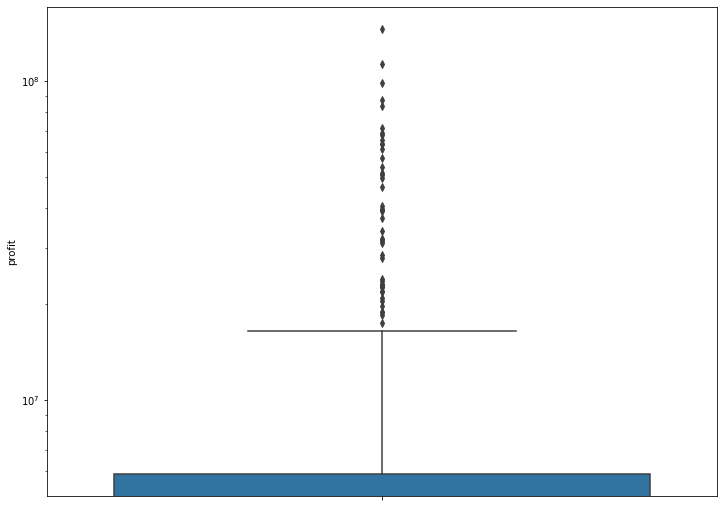

In [711]:
sns.boxplot( y=new["profit"] )
plt.yscale('log')

# Barplot of the number of movies per country

The barplot below depicts the number of movies produced in seven countries. We can clearly see that USA has by far the most movies produced (312) with Canada (21) and UK (18) being considerably behind. Because of that, USA is a very strong candidate as the place we are going to produce our movie.

C:\Users\Markos\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


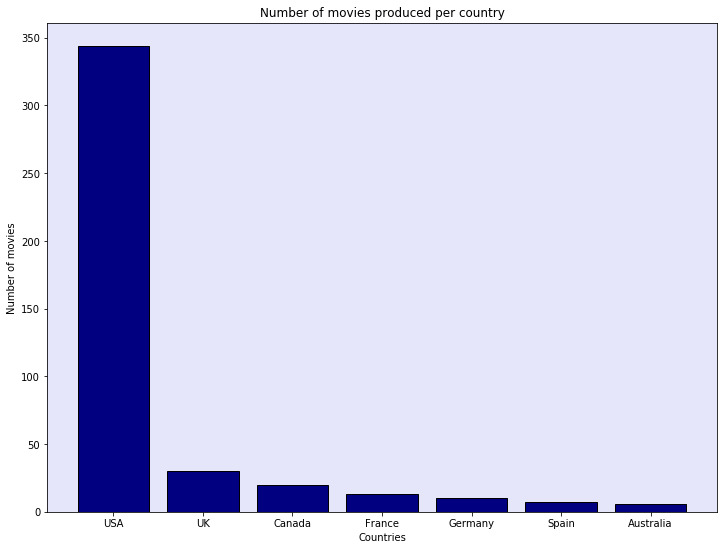

In [754]:
# Create a subset with the number of movies every country has
movies_per_country = new.loc[:,['director_name', 'country']].groupby('country')['director_name'].count()
movies_count = movies_per_country.reset_index(name='No. of movies').sort_values(['No. of movies'], ascending=False)

# Creating a barplot of the subset 'movies_count'
plt.bar(movies_count['country'], movies_count['No. of movies'], color = 'navy', edgecolor='black')

# Setting color in the barplot background 
plt.axes().set_facecolor("lavender")

# Add title and axis names
plt.title('Number of movies produced per country')
plt.xlabel('Countries')
plt.ylabel('Number of movies')
   
# Show graphic
plt.show()

In [755]:
tt =new.loc[:,['country','profit']].groupby('country')['profit'].mean()
gt = tt.reset_index(name='average profit').sort_values(['average profit'], ascending=False)
tt =new.loc[:,['country','profit']].groupby('country')['profit'].count()
print(gt,tt)

     country  average profit
6        USA    9.310243e+06
2     France    5.494328e+06
5         UK    3.025729e+06
3    Germany    2.054401e+06
0  Australia    2.931442e+05
1     Canada   -1.748251e+05
4      Spain   -2.430966e+06 country
Australia      6
Canada        20
France        13
Germany       10
Spain          7
UK            30
USA          344
Name: profit, dtype: int64


# Movies "duration" category Analysis

Another variable that we considered is the "duration" which refers to the duration of a movie. Below we plotted a histogram to see the duration most of our movies have and a scatterplot to see how much profit these movies generated in respect to their duration. Combining the results of those two, we were able to narrow down our preferable duration for our movie to 90-120 minutes. 

# Histogram of the duration of the movies 

The histogram below depicts the frequency of the duration of the movies. We can see that most movies had duration between 75 and 125 minutes. However there are also movies that their duration was either too small (40 minutes) or too big (165 minutes).

C:\Users\Markos\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


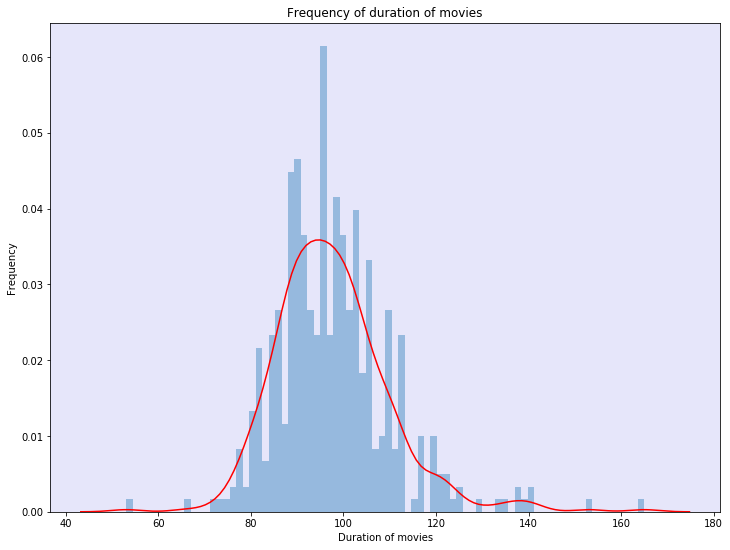

In [756]:
# Creating a histogram for the duration of movies 
sns.distplot(a=new['duration'], hist=True, kde=True,rug=False, bins=80,
             rug_kws={"color": "orange", "alpha":5, "linewidth": 1, "height":0.05 },
             kde_kws={"color": "red", "alpha":1, "linewidth": 1.5, "shade":False })

# Setting color in the histogram background 
plt.axes().set_facecolor("lavender")

# Adding title and axis names
plt.title("Frequency of duration of movies")
plt.xlabel('Duration of movies')
plt.ylabel('Frequency')

# Show graphic
plt.show()

# Scatterplot of duration vs profit

The scatterplot below shows the amount of profit generated for every movie in regard with their duration. As we know from the histogram above, most of our movies are within the 75-125 minutes gap. Many movies within this duration period generated profit or made loss. However, the movies that generated profit, made significantly more profit than the movies that made a loss. This can be seen in the plot below as most of the movies made a profit between 1 and 5 million USD.........

C:\Users\Markos\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


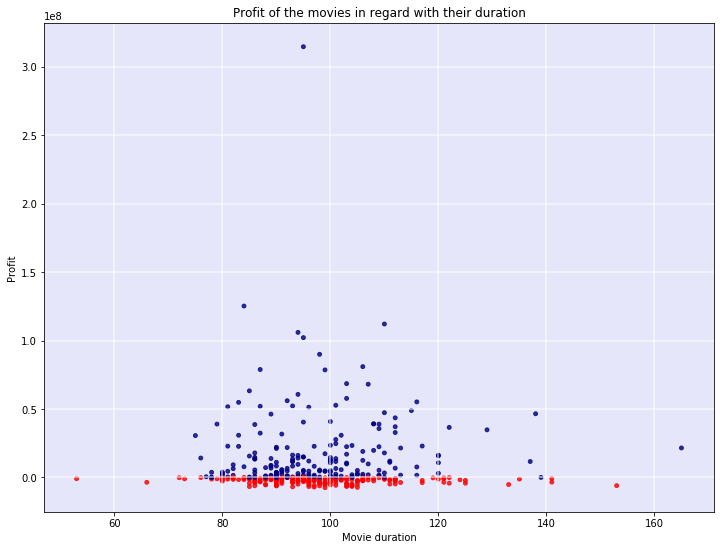

In [757]:
# Create a different color for the movies that have profit>0 and profit<0
my_color=np.where(new['profit']>=0, 'navy','red')

# Creating a scatterplot using the 'duration' and 'profit' variables
plt.rcParams["figure.figsize"] = [12,9] 
plt.vlines(x = new['duration'], ymin=0, ymax = new['profit'], color=my_color, alpha=0)
plt.scatter(new['duration'], new['profit'], color=my_color, s=15, alpha=0.8)

#Adding major gridlines and color to the scatterplot background
plt.grid(color='white', linestyle='-', linewidth=2, alpha=0.5) 
plt.axes().set_facecolor("lavender")

# Adding title and axis names 
plt.title("Profit of the movies in regard with their duration")
plt.xlabel('Movie duration')
plt.ylabel('Profit')


# Show graphic
plt.show()

# 1e8 = 1x(10^8)

After plotting the histogram and the scatterplot we started searching for our preferable duration for our movie. We focused in 3 scenarios: (80-120 minutes, 90-120 minutes 90-110 minutes). We counted how many movies each period had and how much was the mean profit generated. In the first case, 434 movies out of 488 were included with a mean profit of 9.193.799 USD dollars. In the second case, 318 movies out of 488 were included with a mean profit of 8.639.837 USD while in the third case 271 movies out of 488 were included with a mean profit of 7.293.092 USD. We selected the second case as the first had a very broad duration span although the higher mean profit............

In [625]:
# new
# # profit_duration = new.loc[:,['profit', 'duration']].groupby('duration')['profit'].mean()
# # duration_profit = profit_duration.reset_index(name='mean profit').sort_values(['mean profit'], ascending=False)


# # Number and mean profit of movies with duration between 80 and 120 minutes
# new.loc[(new['duration'] > 80) & (new['duration'] <120)].count() # 434 movies out of 488
# duration_profit[(duration_profit['duration'] > 80) & (duration_profit['duration'] < 120)]['profit'].mean() # 9.193.799 USD
 
    
# # Number and mean profit of movies with duration between 90 and 120 minutes
# new.loc[(new['duration'] > 90) & (new['duration'] <120)].count() # 318 movies out of 488
# duration_profit[(duration_profit['duration'] > 90) & (duration_profit['duration'] < 120)]['profit'].mean() # 8.639.837 USD


# # Number and mean profit of movies with duration between 90 and 110 minutes
# new.loc[(new['duration'] > 90) & (new['duration'] <110)].count() # 271 movies out of 488
# duration_profit[(duration_profit['duration'] > 90) & (duration_profit['duration'] < 110.0)]['profit'].mean() # 7.293.092 USD

In [758]:
new.loc[(new['duration'] > 80) & (new['duration'] <120)].count() # 434 movies out of 488
new[(new['duration'] > 80) & (new['duration'] < 120)]['profit'].mean() # 9.193.799 USD / 6.571.104
ggg = new[(new['duration'] > 80) & (new['duration'] < 120)]['profit'] 
    
# Number and mean profit of movies with duration between 90 and 120 minutes
new.loc[(new['duration'] > 90) & (new['duration'] <120)].count() # 318 movies out of 488
new[(new['duration'] > 90) & (new['duration'] < 120)]['profit'].mean() # 8.639.837 USD / 6.792.668
fff = new[(new['duration'] > 90) & (new['duration'] < 120)]['profit']

# Number and mean profit of movies with duration between 90 and 110 minutes
# new.loc[(new['duration'] > 90) & (new['duration'] <110)].count() # 271 movies out of 488
# new[(new['duration'] > 90) & (new['duration'] < 110.0)]['profit'].mean() # 7.293.092 USD /6.132.901

In [759]:
fff_means=fff.mean()
fff_std=fff.std()
fff_count=fff.count()

P_G = (fff_means-6000000)/(fff_std/np.sqrt(fff_count))
p_value_from_normal=(1-stats.norm.cdf(P_G))
print ('one tail p value from normal: ', p_value_from_normal)      

# fff_means

one tail p value from normal:  0.055286880679148886


# Director selection Analysis

In [760]:
kas = new.loc[:,['director_name', 'country']].groupby('director_name')['director_name'].count()

director_count = kas.reset_index(name='No. of movies').sort_values(['No. of movies'], ascending=False)
director_count

,director_name,No. of movies
311,Richard Linklater,4
183,Jon Gunn,3
246,Michael Tiddes,3
8,Alex Kendrick,3
152,James Wan,3
70,David Gordon Green,3
202,Kelly Reichardt,2
349,Steven Soderbergh,2
256,Mike Mills,2
179,John Sayles,2


In [773]:
direc = new.loc[:,['director_name', 'profit']].groupby('director_name')['profit'].mean()

mean_profit_direct = direc.reset_index(name='Average profit').sort_values(['Average profit'], ascending=False)
# mean_profit_direct



# direc.loc[(direc['director_name'] == 'David Gordon Green')]
# das.loc[(das['director_name']) == 'Michael Tiddes']
# das.loc[(das['director_name']) == 'Richard Linklater']
# new[(new['director_name']) == 'Jon Gunn']
# das.loc[(das['director_name']) == 'James Wan']
# das.loc[(das['director_name']) == 'Alex Kendrick']


# df.loc[(df['director_name'] == 'Richard Linklater')]
# ['profit'].mean()

# new[(new['budget'] <1500000)].count() # 138


In [774]:
movies_per_country = new.loc[:,['director_name', 'duration']].groupby('duration')['director_name'].count()

duration_count = movies_per_country.reset_index(name='No. of movies').sort_values(['No. of movies'], ascending=False)
m=duration_count[(duration_count['duration'] > 80.0) & (duration_count['duration'] < 120.0)].sum() # count 249
# o=duration_count[(duration_count['duration'] > 100.0) & (duration_count['duration'] < 125.0)].sum() # count 166
duration_count['No. of movies'].sum()


430

# IMDB score analysis

# Histogram of IMDB score

C:\Users\Markos\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


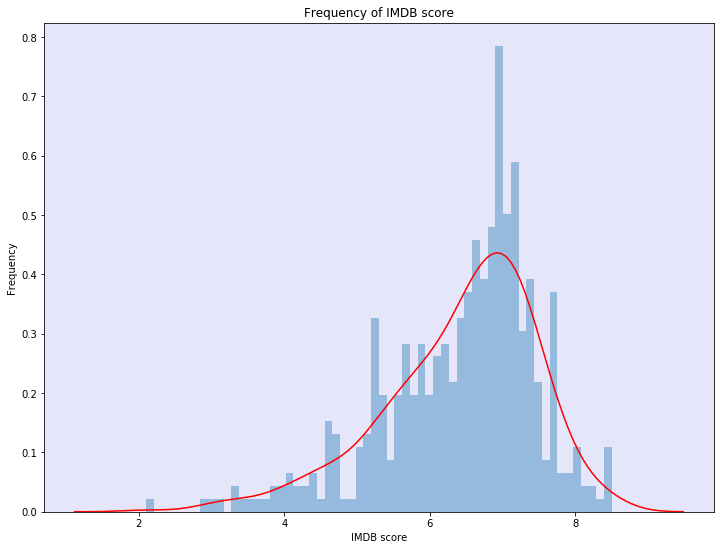

In [775]:
# Creating a histogram for the IMDB score of movies 
sns.distplot(a=new['imdb_score'], hist=True, kde=True,rug=False, bins=60,
             rug_kws={"color": "orange", "alpha":5, "linewidth": 1, "height":0.05 },
             kde_kws={"color": "red", "alpha":1, "linewidth": 1.5, "shade":False })

# Setting color in the histogram background 
plt.axes().set_facecolor("lavender")

# Adding title and axis names
plt.title("Frequency of IMDB score")
plt.xlabel('IMDB score')
plt.ylabel('Frequency')

# Show graphic
plt.show()

# Scatterplot of IMDB score vs profit

C:\Users\Markos\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


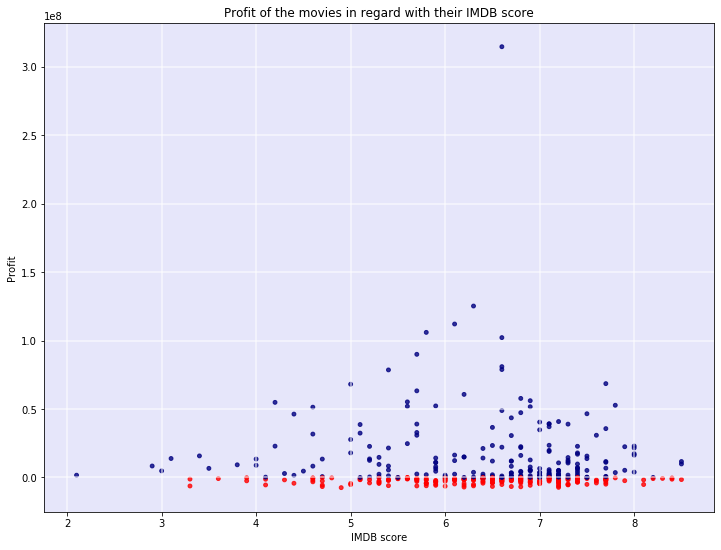

In [776]:
# Creating a different color for the movies that have profit>0 and profit<0
my_color=np.where(new['profit']>=0, 'navy','red')

# Creating a scatterplot using the 'imdb_score' and 'profit' variables
plt.rcParams["figure.figsize"] = [12,9] 
plt.vlines(x = new['imdb_score'], ymin=0, ymax = new['profit'], color=my_color, alpha=0)
plt.scatter(new['imdb_score'], new['profit'], color=my_color, s=15, alpha=0.8)

#Adding major gridlines and color to the scatterplot background
plt.grid(color='white', linestyle='-', linewidth=2, alpha=0.5) 
plt.axes().set_facecolor("lavender")

# Adding title and axis names
plt.title("Profit of the movies in regard with their IMDB score")
plt.xlabel('IMDB score')
plt.ylabel('Profit')

# Show graphic
plt.show()

# T testing

# Hypothesis 1
Is the mean profit of movies with IMDB score greater than 7.0 significantly different from the mean profit of movies with IMDB score lower than 7.0?

In [723]:
high_imdb = new[(new['imdb_score'] >= 7.0)]
low_imdb = new[(new['imdb_score'] < 7.0)]

In [724]:
high_imdb.count() # 184
high_imdb['profit'].mean() # 6.728.511

low_imdb.count() # 304
low_imdb['profit'].mean() # 8.091.441

7891584.5279174

In [726]:
from scipy import stats 

imdb_m=new.loc[:,['imdb_score','profit']].groupby('imdb_score')['profit'].mean()
imdb_means=imdb_m.reset_index(name='average profit')

highimdb_means = imdb_means.loc[(imdb_std['imdb_score'] >= 7.0)]
lowimdb_means = imdb_means.loc[(imdb_std['imdb_score'] < 7.0)]

highimdb_means=highimdb_means.reset_index()
lowimdb_means=lowimdb_means.reset_index()



imdb_s=new.loc[:,['imdb_score','profit']].groupby('imdb_score')['profit'].std()
imdb_std=imdb_s.reset_index(name='average profit')

highimdb_std = imdb_std.loc[(imdb_std['imdb_score'] >= 7.0)]
lowimdb_std = imdb_std.loc[(imdb_std['imdb_score'] < 7.0)]

highimdb_std=highimdb_std.reset_index()
lowimdb_std=lowimdb_std.reset_index()



imdb_c=new.loc[:,['imdb_score','profit']].groupby('imdb_score')['profit'].count()
imdb_count=imdb_c.reset_index(name='average profit')

highimdb_count = imdb_count.loc[(imdb_std['imdb_score'] >= 7.0)]
lowimdb_count = imdb_count.loc[(imdb_std['imdb_score'] < 7.0)]

highimdb_count=highimdb_count.reset_index()
lowimdb_count=lowimdb_count.reset_index()


combinederror=(((highimdb_std['average profit'].mean()**2)/(highimdb_count['average profit'].mean()))
              +((lowimdb_std['average profit'].mean()**2)/lowimdb_count['average profit'].mean()))**0.5

z=(highimdb_means['average profit'].mean()-lowimdb_means['average profit'].mean())/combinederror

p_value_from_normal_for_diff = (1-stats.norm.cdf(z))
print ('one_tail more than 7-less than 7 difference: ', p_value_from_normal_for_diff)


one_tail more than 7-less than 7 difference:  0.629936261768514
